## 数据探索与分析

- 导入数据
- 数据类型分析 
      1 数值，字符串类型
- 无关特征删除
      1 类别特征
            1 unique=1 ， 删除
            2 unique=all ，查看是否包含其他有用信息
            3 unique=部分，找出占比例较大的类。查看是否有用
      2 数值特征   
            1 数值特征 unique=1 删除（有时候ID也包含了信息） 
            2 数值特征 unique = all 进行分段，查看与标签值的关系，该特征或许包含其他信息
            3 如果特征是个索引，或者递增的序列，一般无用，删除
- 数据类型转换
       1 将类别特征的字符串转化为数值。如果特征有距离属性采用自然数编码，没有距离属性，可以用one-hot
       2 将日期（年、天数）也可以转化成数值。
- 缺失值处理
      1 缺失比例>10%，转换成one-hot编码
      2 缺失比例<1% ,用众数或平均数填补 
               1 unique>10 用平均数
               2 unique<10 用众数
      3 缺失比例1%-10%，用随机森林预测填充
      4 时间的缺失,看缺失值的比例，可以先将时间解析成固定格式，最后再转化原来的格式
- 检查是否还存在缺失值

## 特征选择、衍生
- IV值
- 特征重要性：随机森林、lasso、线性回归、XGB等模型 
- 相关系数
- 特征衍生：多项式

## 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [187]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
#关闭警告  
pd.set_option('mode.chained_assignment',None)

In [3]:
matplotlib.rcParams['font.sans-serif'] = ['FangSong'] #指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#### 导入数据

In [4]:
data = pd.read_csv('data.csv',encoding = 'gb18030')

In [5]:
data.shape

(4754, 90)

In [6]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


#### 数据类型分析

In [7]:
data.info() 
#90列   4753行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

 数值特征83个，字符串类型特征7个，多数值缺失值不是特别多。

In [8]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [9]:
data.describe(include='O') #非数值特征的属性7列

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180507122057742000000388306943,卡号1,一线城市,xs,李杰,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


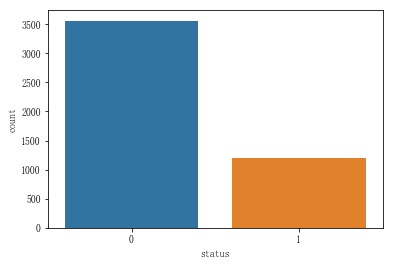

In [10]:
sns.countplot(data['status']) #查看目标值的比例

In [11]:
stats = []
#计算每一列的  列名  列包含多少类  列空的比例  列最多的元素所占比例  列类型
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
#   将缺失值 按照降序排列 
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,student_feature,2,63.062684,63.062684,float64
33,cross_consume_count_last_1_month,19,8.960875,64.535128,float64
58,latest_six_month_apply,65,6.394615,6.394615,float64
56,latest_one_month_apply,36,6.394615,17.522087,float64
55,latest_query_time,207,6.394615,8.897770,object
54,query_sum_count,74,6.394615,6.394615,float64
53,query_cash_count,17,6.394615,15.649979,float64
52,query_finance_count,25,6.394615,11.190576,float64
51,query_org_count,46,6.394615,6.394615,float64
50,apply_credibility,41,6.394615,11.022297,float64


#### 无关特征删除
- 类别特征   bank_card_no 和 source 的unique=1 删除

In [12]:
data.drop(['bank_card_no', 'source'], axis=1, inplace=True)

- trade-no

In [13]:
data['trade_no'].head(10)
data['trade_no'].tail(10)

4744    20180507115029481000000388194850
4745    20180507123619864000000388369012
4746    20180507125012243000000023109396
4747    20180507123811494000000388377504
4748    20180507121025853000000388266701
4749    20180507120519228000000388247328
4750    20180507114937914000000388192877
4751    20180507121340509000000388278785
4752    20180504161827128000000381357758
4753    20180507124243041000000388391027
Name: trade_no, dtype: object

In [14]:
def parse_trade_no(array):
    lst = [array[:4], array[4:6], array[6:8], array[-10:]]
    return lst

In [15]:
trade_no_data = pd.DataFrame(data['trade_no'].map(parse_trade_no).values.tolist(),columns=['tradeno_year', 'tradeno_month', 'tradeno_day', 'tradeno_id'])

In [16]:
trade_no_data.describe()

,tradeno_year,tradeno_month,tradeno_day,tradeno_id
count,4754,4754,4754,4754
unique,1,1,3,4754
top,2018,05,07,0388180662
freq,4754,4754,3682,1


trade_no 字段像个 id 字段，假设前 8 位是年月日信息，可以看出 trade_no 均是在 2018 年 5 月份，tradeno_id 各不相同，保留 tradeno_day，其他的信息删除。

In [17]:
data = pd.concat((data.drop('trade_no',axis=1),trade_no_data['tradeno_day']),axis=1)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


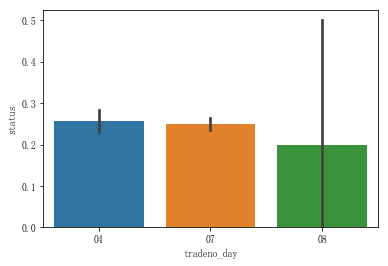

In [18]:
sns.barplot(data=data,x='tradeno_day',y = 'status') #柱状图比较数据的大小， 误差棒：标准差

- id__name 找出较多的人的名字, 查看下逾期率

In [19]:
idname_count = data['id_name'].value_counts()
idname_count  = idname_count[idname_count>3]
idn_df = data[data['id_name'].isin(idname_count.index)]

In [20]:
idn_df['id_name'].value_counts()

李明    5
张龙    5
李杰    5
张伟    4
陈波    4
李波    4
刘强    4
张超    4
陈鹏    4
Name: id_name, dtype: int64

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


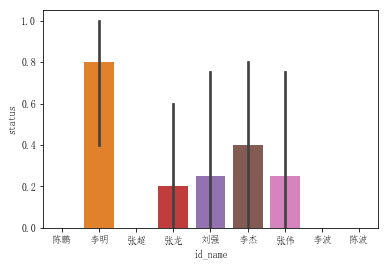

In [21]:
sns.barplot(data = idn_df, x = 'id_name',y = 'status')

In [22]:
data['is_LiMing'] = (data['id_name'] == '李明').apply(int)
data.drop('id_name',axis = 1,inplace = True)

### 数值特征

In [23]:
value_cols = data.describe().columns

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text xticklabel objects>)

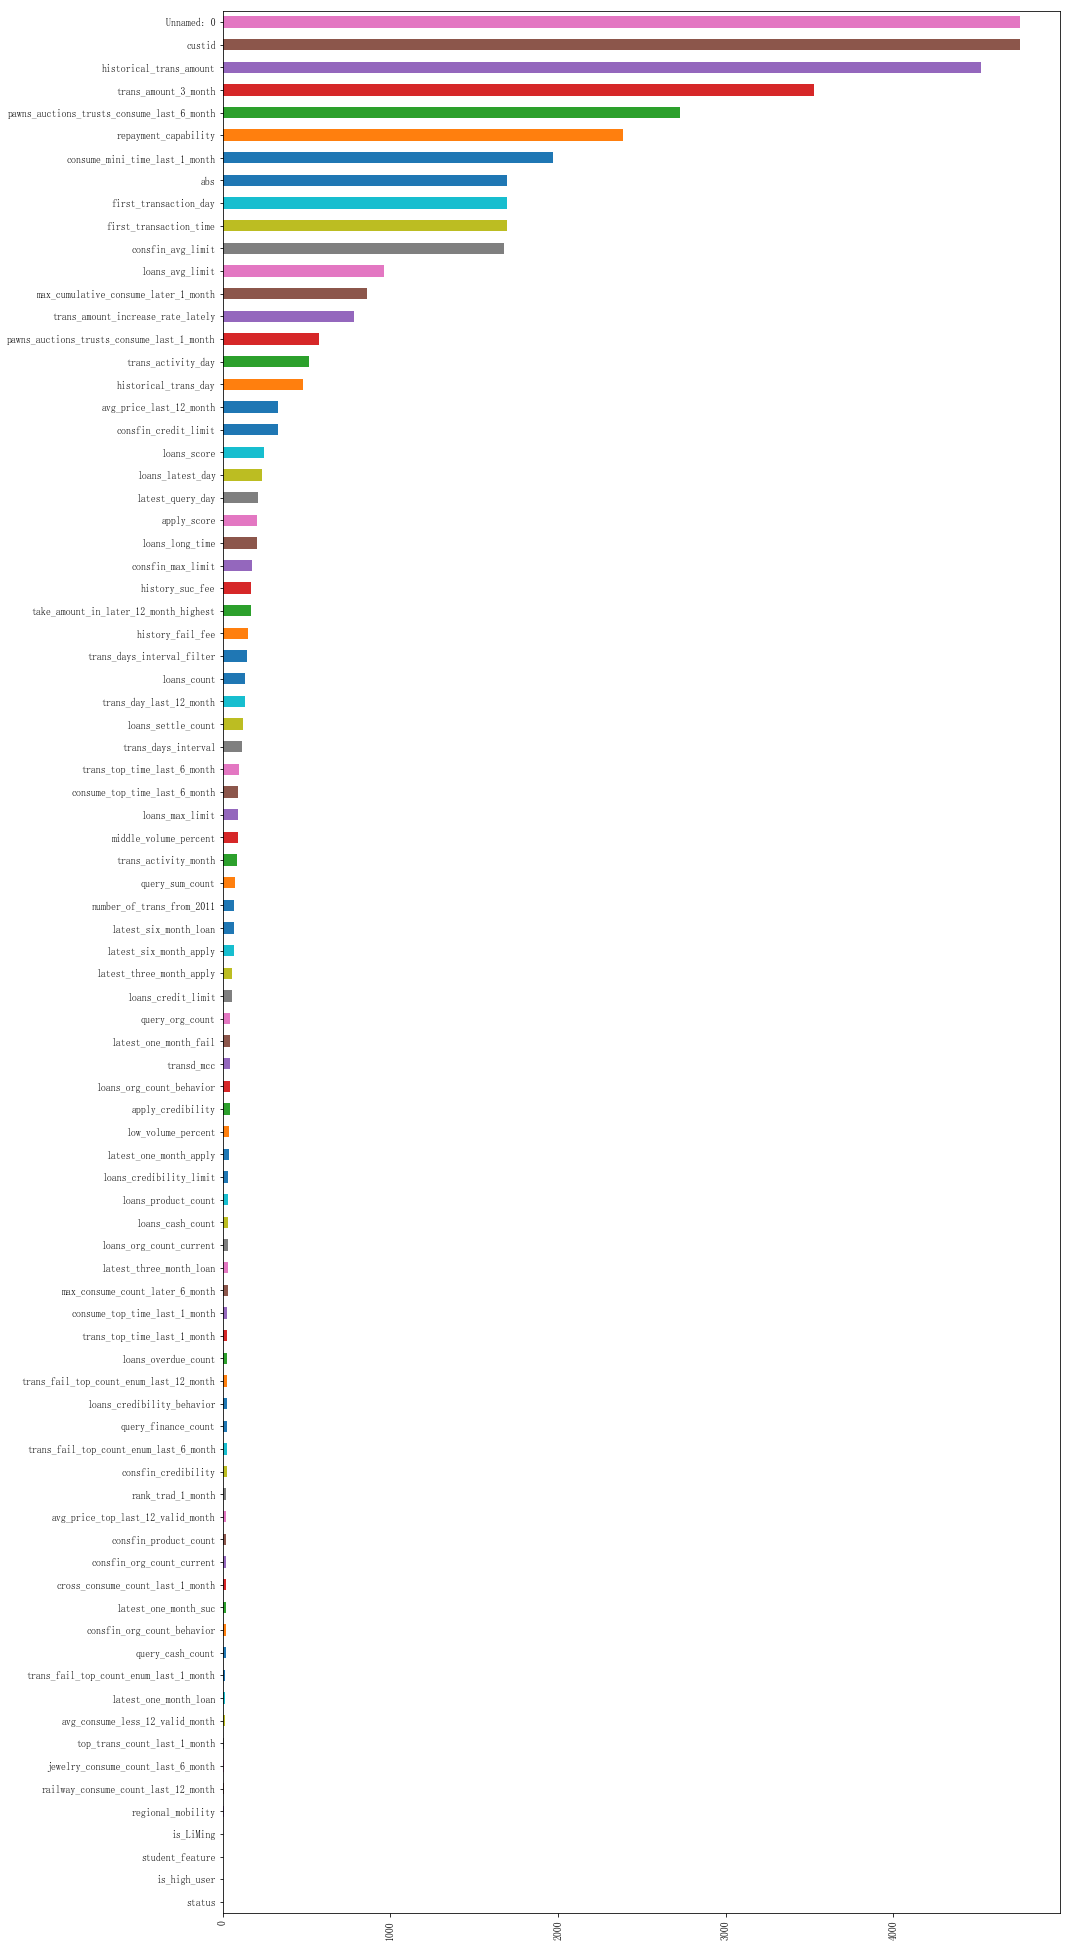

In [24]:
data[value_cols].nunique().sort_values().plot(kind = 'barh', figsize =(15,35))
plt.xticks(rotation = 90)

In [25]:
data[value_cols].columns[  data[value_cols].nunique()<10 ]

Index(['regional_mobility', 'student_feature', 'is_high_user',
       'top_trans_count_last_1_month', 'railway_consume_count_last_12_month',
       'jewelry_consume_count_last_6_month', 'status', 'is_LiMing'],
      dtype='object')

In [26]:
print('数值特征 unique < 10 个数：', len(data[value_cols].columns[data[value_cols].nunique()<10]))
print('数值特征 unique < 20 个数：', len(data[value_cols].columns[data[value_cols].nunique()<20]))
print('数值特征 unique < 30 个数：', len(data[value_cols].columns[data[value_cols].nunique()<30]))

数值特征 unique < 10 个数： 8
数值特征 unique < 20 个数： 16
数值特征 unique < 30 个数： 28


In [27]:
print('全部为 unique 的特征', data[value_cols].columns[data[value_cols].nunique()==len(data)])

全部为 unique 的特征 Index(['Unnamed: 0', 'custid'], dtype='object')


'Unnamed: 0', 'custid'，unique为所有样本即没没有相同值的情况，先不予删除。

#### custid
- custid 范围中 100~400W，如果假设注册越早，id 越小，看一下 id 大小与逾期率的关系。- 

In [28]:
np.logspace(1, 10, 7)

array([1.00000000e+01, 3.16227766e+02, 1.00000000e+04, 3.16227766e+05,
       1.00000000e+07, 3.16227766e+08, 1.00000000e+10])

In [51]:
custid_range = np.logspace(1, 7, 7)[1:]

In [30]:
df = data

In [31]:
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])

In [32]:
df['cust_id_bin'].value_counts()

1000000.0    3249
100000.0     1342
10000.0       149
1000.0         13
100.0           1
Name: cust_id_bin, dtype: int64

label 为 100 数据太少，并入 1000 中，1000000 之后再详细划分

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


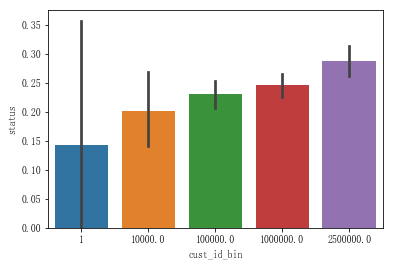

In [33]:
custid_range = [1, 1e4, 1e5, 1e6, 2.5e6, 5e6]
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])
sns.barplot(data=df, x='cust_id_bin', y='status')

正如猜想的一样，id 越小，逾期率越低，可能原因是越最近注册的，是新用户，紧急用钱，越可能逾期。先保留 id 这个特征。

#### Unnamed: 0    
diff()差分函数，diff()= df - df.shift()

In [34]:
sum(df['Unnamed: 0'].diff(1)>0)

4753

In [35]:
len(df)

4754

Unnamed: 0 这个特征数值是递增的，删除

In [36]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_LiMing,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [37]:
data.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_LiMing,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [38]:
len(df.describe().columns)

83

### 数据类型转换

In [39]:
df.describe(include='O')

,reg_preference_for_trad,latest_query_time,loans_latest_time,tradeno_day
count,4752,4450,4457,4754
unique,5,207,232,3
top,一线城市,2018-04-14,2018-05-03,07
freq,3403,423,134,3682


#### reg_preference_for_trad

In [40]:
df['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

城市之间存在大小差别，采用自然数编码

In [41]:
city_map = {'一线城市':1, '二线城市':2, '三线城市':3, '其他城市':0, '境外':5}

In [42]:
df['reg_preference_for_trad'] = df['reg_preference_for_trad'].map(city_map)

#### tradeno_day

In [43]:
df['tradeno_day'] = df['tradeno_day'].astype('int')

In [44]:

df.describe(include='O')

,latest_query_time,loans_latest_time
count,4450,4457
unique,207,232
top,2018-04-14,2018-05-03
freq,423,134


In [45]:
-------------

SyntaxError: invalid syntax (<ipython-input-45-cca701156b41>, line 1)

### 缺失值处理
- 缺失值大概分成大类，比例在 60%，5%~10%, 1% 左右

In [57]:
nan_prop = df.isnull().sum(axis = 0)[df.isnull().sum(axis = 0)!=0]/df.shape[0]*100

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text xticklabel objects>)

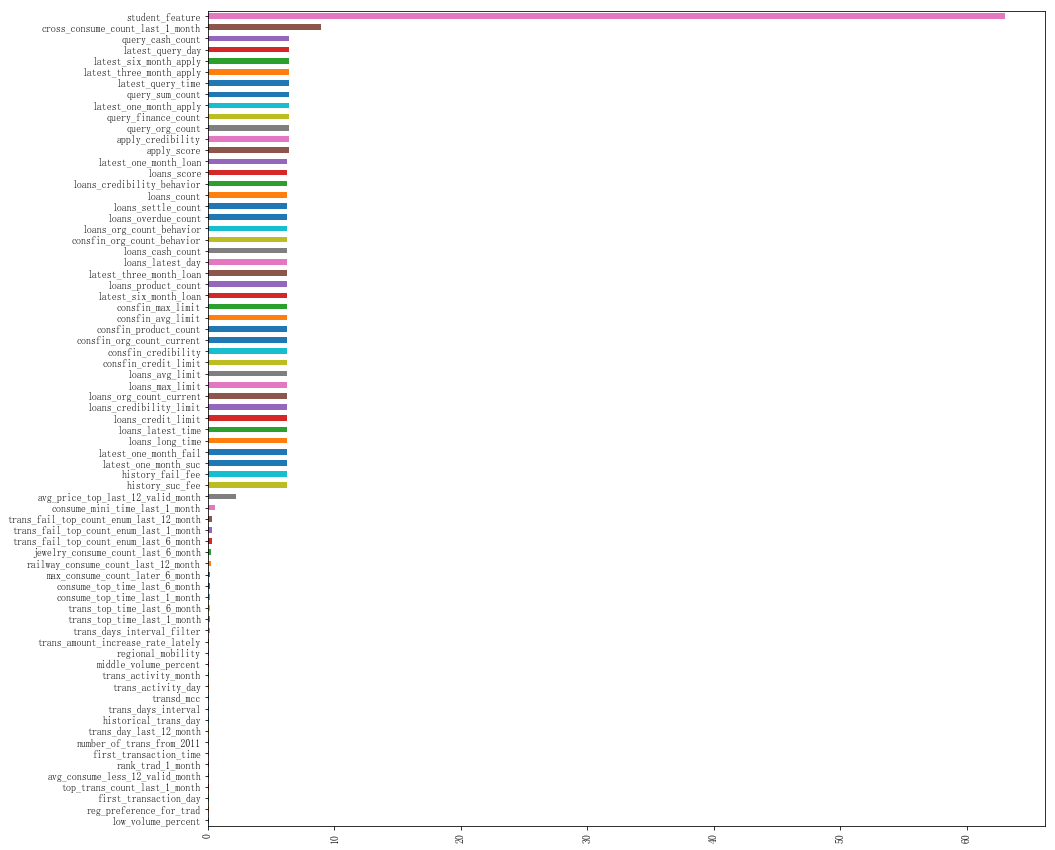

In [61]:
nan_prop.sort_values().plot(kind = 'barh', figsize =(15,15))
plt.xticks(rotation = 90)

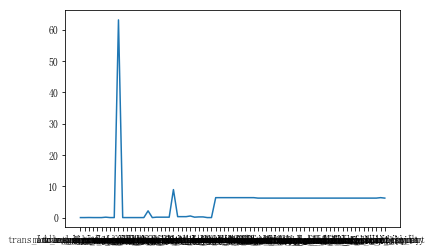

In [58]:
plt.plot(nan_prop)

####  缺失比例>10%
- 只有一列，转换成 one-hot 编码

In [62]:
nan100 = df[df.columns[df.isnull().sum(0)/df.shape[0]>0.1]]

In [63]:
nan100.columns

Index(['student_feature'], dtype='object')

In [64]:
nan100['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [66]:
# pd.get_dummies(nan100.fillna('NA'))

,student_feature_1.0,student_feature_2.0,student_feature_NA
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,1,0,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [67]:
def parse_student_feature(array):
    lst = [0, 0, 0]
    if array == 1:
        lst[0] = 1
    elif array == 2:
        lst[1] = 1
    else:
        lst[2] = 1
    return lst

In [75]:
stu_featdf = pd.DataFrame(df['student_feature'].apply(parse_student_feature).values.tolist(
), columns=['student_feat_1', 'student_feat_2', 'student_feat_na'])

In [77]:
df = pd.concat((df.drop('student_feature', axis=1), stu_featdf), axis=1)

#### 缺失比例 < 1%
- 用众数或平均数填补

In [87]:
na1 = df[df.columns[(df.isnull().sum(0)/df.shape[0]<0.01)&(df.isnull().sum(0)/df.shape[0]>0)]]
na1.nunique()

low_volume_percent                           40
middle_volume_percent                        90
trans_amount_increase_rate_lately           782
trans_activity_month                         84
trans_activity_day                          512
transd_mcc                                   41
trans_days_interval_filter                  147
trans_days_interval                         114
regional_mobility                             5
number_of_trans_from_2011                    70
first_transaction_time                     1693
historical_trans_day                        476
rank_trad_1_month                            20
avg_consume_less_12_valid_month              12
top_trans_count_last_1_month                  8
reg_preference_for_trad                       5
trans_top_time_last_1_month                  28
trans_top_time_last_6_month                  97
consume_top_time_last_1_month                28
consume_top_time_last_6_month                94
trans_fail_top_count_enum_last_1_month  

In [ ]:
na1.head()

In [88]:
na1.isnull().sum()

low_volume_percent                          2
middle_volume_percent                       2
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_day                        2
rank_trad_1_month                           2
avg_consume_less_12_valid_month             2
top_trans_count_last_1_month                2
reg_preference_for_trad                     2
trans_top_time_last_1_month                 8
trans_top_time_last_6_month                 8
consume_top_time_last_1_month               8
consume_top_time_last_6_month               8
trans_fail_top_count_enum_last_1_month     16
trans_fail_top_count_enum_last_6_m

In [89]:
print(df[df['trans_fail_top_count_enum_last_1_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_6_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_12_month'].isnull()].index)

Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')


trans_fail_top_count_enum_last_X_month 这几个特征在同一个位置信息都是缺失的。
从数据来看，12month count 数目大于 6month，大于 1month。
填充缺失值后注意检查一下。  
unique<10 的分类用众数，

unique>10 的用平均数填充

In [94]:
df[df['status']==1]['trans_fail_top_count_enum_last_1_month'].value_counts().index[0]

2.0

In [90]:
def parse_na1(dftmp):
    d = {}
    for i in dftmp.columns:
        if dftmp[i].nunique() < 10:
            status1 = dftmp[df['status']==1][i].value_counts().index[0]
            status0 = dftmp[df['status']==0][i].value_counts().index[0]
            d[i] = {'1':status1, '0':status0}
        elif dftmp[i].nunique() >= 10:
            status1 = int(dftmp[df['status']==1][i].dropna().mean())
            status0 = int(dftmp[df['status']==0][i].dropna().mean())
            d[i] = {'1':status1, '0':status0}
    return d

In [95]:
na1_values = parse_na1(na1)

In [106]:
for i in na1.columns:
    df.loc[(df[i].isnull()) & (df['status'] == 0), i] = na1_values[i]['0']
    df.loc[(df[i].isnull()) & (df['status'] == 1), i] = na1_values[i]['1']

In [107]:
data = df

In [ ]:
-----------------------

#### 缺失比例 1%~10%
用随机森林预测填充这部分数据

In [109]:
na10 = df[df.columns[(df.isnull().sum(0)/df.shape[0] <= 0.1)
                     & (df.isnull().sum(0)/df.shape[0] >= 0.01)]]

In [119]:
def parse_time(s):
    try:
        #dt = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
        dt = time.mktime(time.strptime(s,"%Y-%m-%d"))
    except:
        dt = np.nan
    return dt

In [120]:
na10['latest_query_time'] = na10['latest_query_time'].apply(parse_time)
na10['loans_latest_time'] = na10['loans_latest_time'].apply(parse_time)

In [121]:
def predict_nan(c):
#     c = 'consfin_avg_limit'
    nan_exist = df.loc[df[c].notnull()].drop(na10.columns, axis=1)# 选择不为空的那些列，   把含有空值的列剔除，相当于X
    y_nan = na10[c][na10[c].notnull()]#已知的不为空值 相当于Y
    nan_null = df.loc[df[c].isnull()].drop(na10.columns, axis=1) #未知的Y 所对应的X
    x = nan_exist.values
    y = y_nan.values
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(x, y)
    c_hat = rfr.predict(nan_null.values)
    c_hat = c_hat.astype(int)
    na10.loc[(na10[c].isnull()), c] = c_hat

In [122]:
for c in na10.columns:
    print('columns', c)
    predict_nan(c)

columns avg_price_top_last_12_valid_month
columns cross_consume_count_last_1_month
columns apply_score
columns apply_credibility
columns query_org_count
columns query_finance_count
columns query_cash_count
columns query_sum_count
columns latest_query_time
columns latest_one_month_apply
columns latest_three_month_apply
columns latest_six_month_apply
columns loans_score
columns loans_credibility_behavior
columns loans_count
columns loans_settle_count
columns loans_overdue_count
columns loans_org_count_behavior
columns consfin_org_count_behavior
columns loans_cash_count
columns latest_one_month_loan
columns latest_three_month_loan
columns latest_six_month_loan
columns history_suc_fee
columns history_fail_fee
columns latest_one_month_suc
columns latest_one_month_fail
columns loans_long_time
columns loans_latest_time
columns loans_credit_limit
columns loans_credibility_limit
columns loans_org_count_current
columns loans_product_count
columns loans_max_limit
columns loans_avg_limit
columns c

In [123]:

na10['loans_latest_time'] = pd.to_datetime(na10['loans_latest_time'], unit='s').dt.strftime('%Y-%m-%d')
na10['latest_query_time'] = pd.to_datetime(na10['latest_query_time'], unit='s').dt.strftime('%Y-%m-%d')

In [124]:
for i in na10.columns:
    df[i] = na10[i]

In [125]:
# 缺失值处理完毕
df.isnull().sum(axis=0)[df.isnull().sum(axis=0)!=0]/df.shape[0]

Series([], dtype: float64)

In [145]:
data = df

#### loans_latest_time latest_query_time  first_transaction_time  三个时间特征给如何处理 
#### 还有一个cust_id_bin    category分类特征  cust_id也没有删除

####  还存在object的类型 和category  暂时删除不会处理的特征与cust_id特征

In [148]:
data = data.drop(['loans_latest_time','latest_query_time','first_transaction_time','custid'],axis = 1)

In [149]:
data = pd.get_dummies(data)

In [150]:
data.filter(regex='cust_id_bin')

,cust_id_bin_1,cust_id_bin_10000.0,cust_id_bin_100000.0,cust_id_bin_1000000.0,cust_id_bin_2500000.0
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,0,1,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans_from_2011                     4754 non-null float64
historical_tran

In [151]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动


#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size

(3327, 1427, 3327, 1427)

## 特征工程
- 用IV和随机森林进行特征选择
- lasso回归进行特征选择
- 相关性分析

In [152]:
X_train.columns

Index(['low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'repayment_capability',
       'is_high_user', 'number_of_trans_from_2011', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       '

In [153]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)

In [155]:
FI_lasso.sort_values('Feature Importance',ascending = False)

,Feature Importance
trans_fail_top_count_enum_last_1_month,0.057084
top_trans_count_last_1_month,0.047546
rank_trad_1_month,0.035959
consfin_org_count_current,0.031604
railway_consume_count_last_12_month,0.024001
cust_id_bin_2500000.0,0.016647
loans_overdue_count,0.014898
latest_one_month_fail,0.011925
loans_count,0.009029
avg_consume_less_12_valid_month,0.006001


(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Text xticklabel objects>)

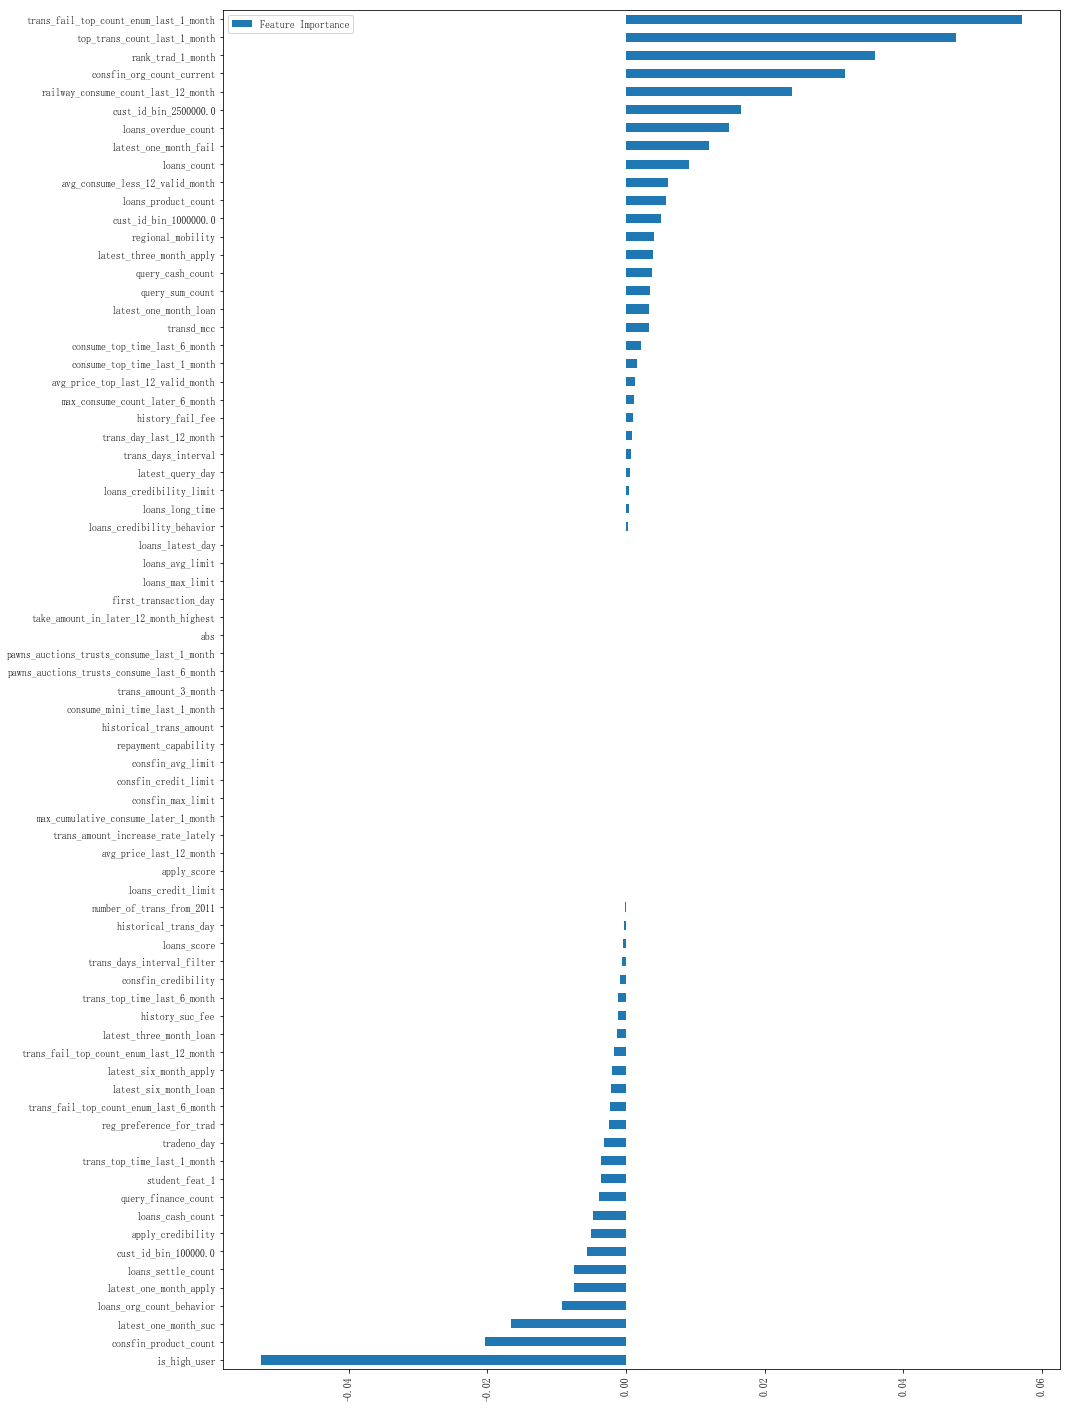

In [156]:
FI_lasso[FI_lasso['Feature Importance'] != 0].sort_values('Feature Importance').plot(kind = 'barh',figsize = (15,25))
plt.xticks(rotation = 90)

#### 相关性分析
- 暂时先放在这 ,似乎没有强相关性的特征

In [157]:
xy = pd.concat([X_train,y_train],axis=1)

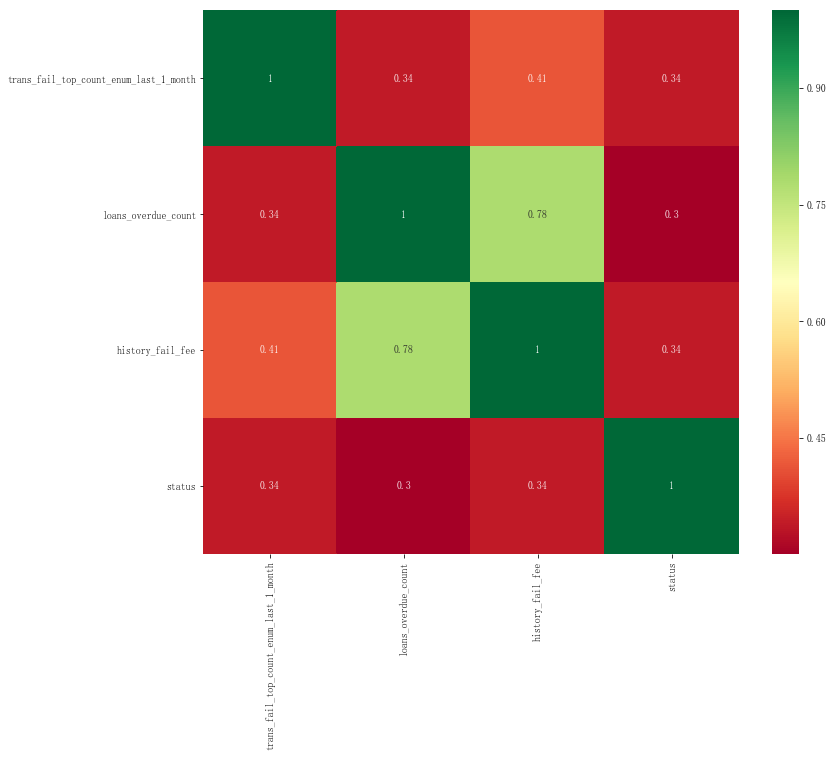

In [158]:
corrmat = xy.corr() #37*37
top_corr_features = corrmat.index[abs(corrmat['status'])>0.3]   #得到大于0.5的索引列 ['ID','AER','BsmtFinSF1']
#top_corr_features
plt.figure(figsize=(12,10))
g = sns.heatmap(xy[top_corr_features].corr(),annot=True, cmap='RdYlGn')

#### IV值

In [161]:
import math
import numpy as np
from scipy import stats
from sklearn.utils.multiclass import type_of_target

In [165]:
def woe(X,y,event=1):
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        #特征离散化
        if type_of_target(x) == 'continious':
            x = discrete(x)
        # 计算特征的woe和iv
        woe_dict, iv = woe_single_x(x,y,feature,event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict)
    return iv_dict

def discrete(x):
    #使用5等分离散化数据
    for i in range(5):
        point1 = stats.scoreatpercentile(x,i*20)
        point2 = stats.scoreatpercentile(x,(i+1)*20)
        x1 = x[np.where((x>=point1) & (x<point2 ))]
        mask = np.in1d(x,x1)
        res[mask] = i+1 
    return res

def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = sum(y == event)
    non_event_total = y.shape[-1] - event_total
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total    
        rate_non_event = non_event_count / non_event_total
        if rate_event == 0:
            rate_event = 0.0001
        elif rate_non_event == 0:
            rate_non_event = 0.0001
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv

In [167]:
iv_dict = woe(x, y)
iv = pd.DataFrame(sorted(iv_dict.items(), key = lambda x:x[1],reverse = True))
iv.head(4)

,0,1
0,historical_trans_amount,2.496720
1,trans_amount_3_month,2.323811
2,pawns_auctions_trusts_consume_last_6_month,1.973102
3,repayment_capability,1.948507


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text xticklabel objects>)

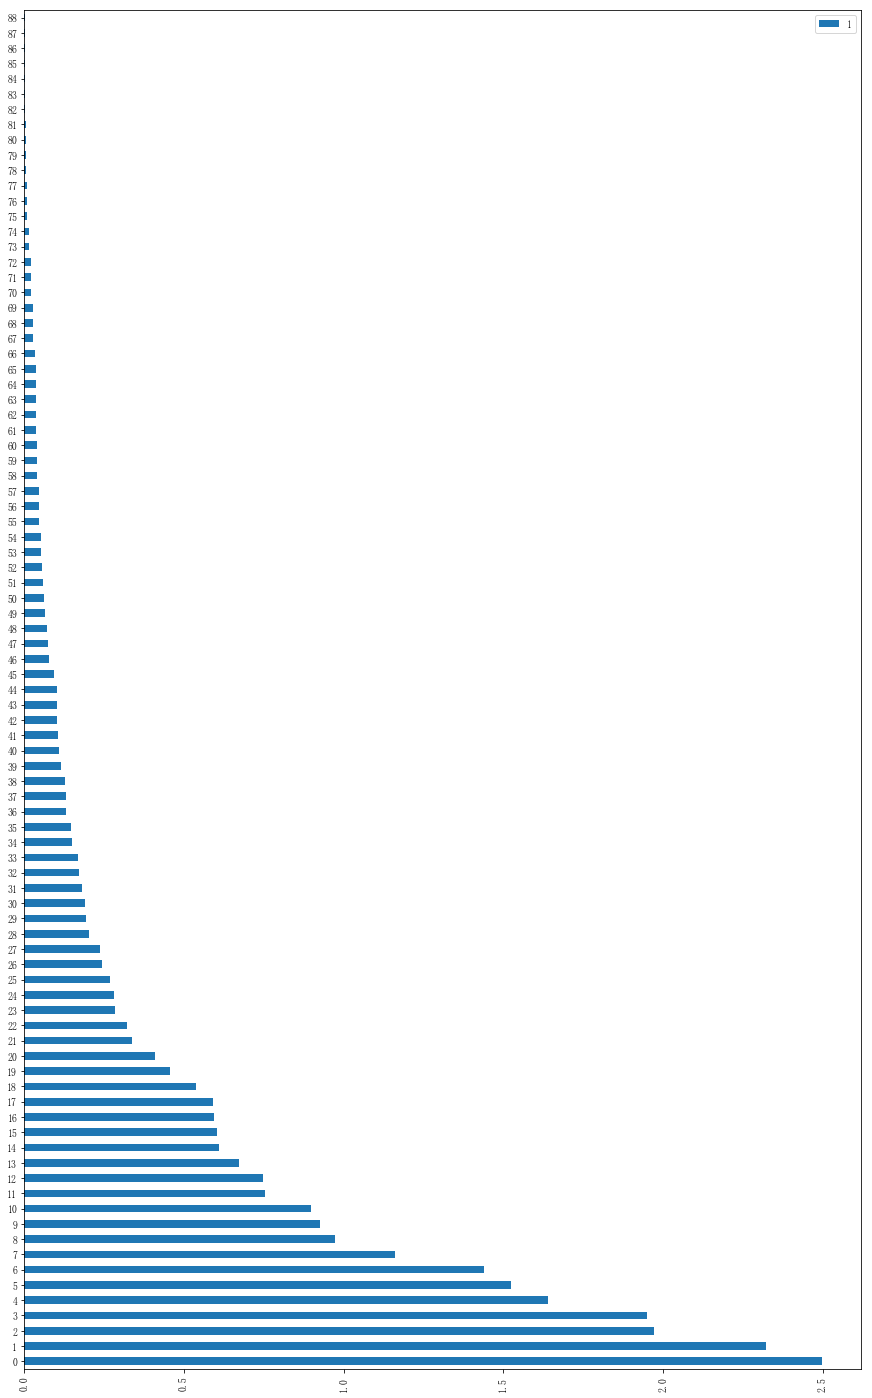

In [171]:
iv.plot(kind = 'barh', figsize =(15,25))
plt.xticks(rotation = 90)

In [168]:
iv_one = iv[iv.iloc[:,1] > 0.1]
iv_one_five = iv_one[iv_one.iloc[:,1] < 0.5]
iv_cols = iv_one_five.iloc[:,0].tolist()
print('原数据特征数{}, 通过IV值筛选后的特征数{}, 剔除了{:.2%}的特征'\
      .format(data.shape[1], len(iv_cols), (data.shape[1]-len(iv_cols))/data.shape[1]))

原数据特征数90, 通过IV值筛选后的特征数26, 剔除了71.11%的特征


#### 随机森林

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:

forset = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)# 等于-1的时候，表示cpu里的所有core进行工作或者直接填写cpu数
forset.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [175]:
# 2)输出重要特征
importances = forset.feature_importances_
indices = np.argsort(importances)[::-1]
feature_labels = data.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

 1) history_fail_fee               0.054693
 2) trans_fail_top_count_enum_last_6_month 0.045868
 3) loans_score                    0.037185
 4) apply_score                    0.030703
 5) latest_one_month_fail          0.030278
 6) loans_overdue_count            0.024941
 7) avg_consume_less_12_valid_month 0.017219
 8) max_consume_count_later_6_month 0.016800
 9) latest_query_day               0.016571
10) is_high_user                   0.015645
11) loans_latest_day               0.015278
12) historical_trans_day           0.015195
13) top_trans_count_last_1_month   0.015153
14) first_transaction_day          0.014951
15) avg_price_top_last_12_valid_month 0.014758
16) consfin_avg_limit              0.014660
17) trans_activity_month           0.014470
18) loans_avg_limit                0.014312
19) consume_mini_time_last_1_month 0.013900
20) trans_day_last_12_month        0.013769
21) history_suc_fee                0.013766
22) transd_mcc                     0.013757
23) trans_fail_top_

In [179]:
FI_RF = pd.DataFrame({"Feature Importance":forset.feature_importances_}, index=X_train.columns)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 <a list of 7 Text xticklabel objects>)

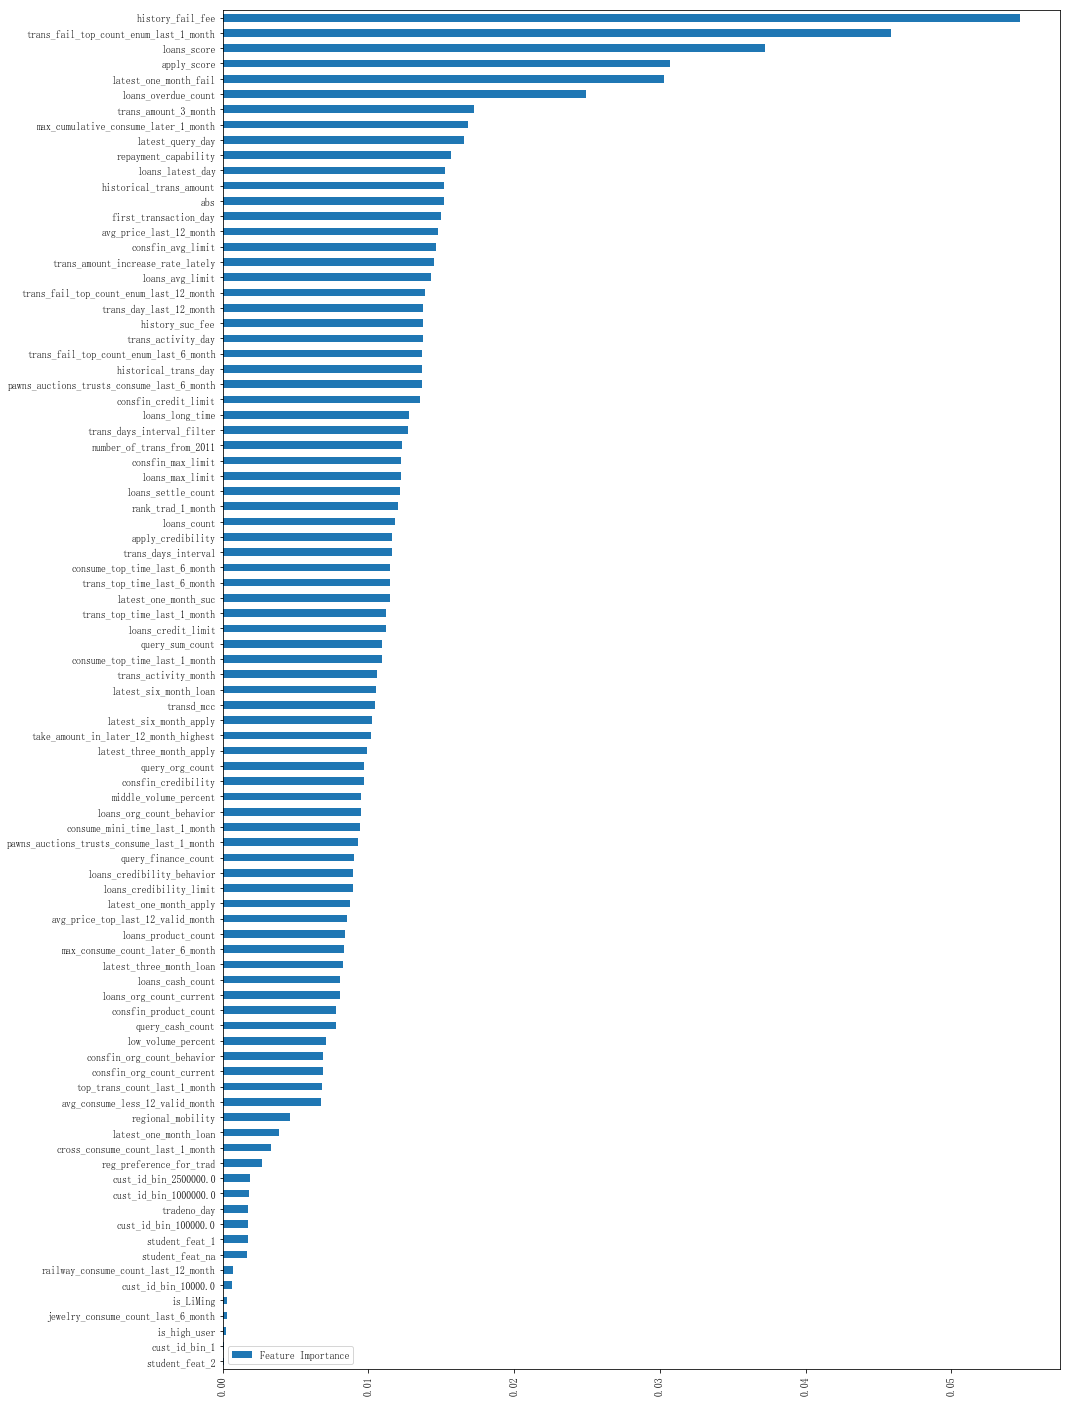

In [180]:
FI_RF.sort_values('Feature Importance').plot(kind = 'barh', figsize =(15,25))
plt.xticks(rotation = 90)

In [181]:
# 3)筛选重要特征
threshold = 0.01
x_selected = X_train.loc[:, importances > threshold]
print('原数据特征数{}, 通过随机森林筛选后的特征数{}, 剔除了{:.2%}的特征'\
      .format(data.shape[1], x_selected.shape[1], (data.shape[1]-x_selected.shape[1])/data.shape[1]))

原数据特征数90, 通过随机森林筛选后的特征数48, 剔除了46.67%的特征


In [ ]:
--------------------到此为止 下面需要做一个特征筛选函数

### 逻辑回归、svm和决策树、随机森林和XGBoost

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

In [208]:
from sklearn.metrics import accuracy_score

In [205]:
models = [LogisticRegression(),RandomForestRegressor(),SVC(),XGBClassifier(),DecisionTreeClassifier()]

In [206]:
names = ["LR","SVC", 'DT', "RF","Xgb"]

In [212]:
for name,model in zip(names,models):    
    score = cross_val_score(model,x,y,cv=5) #相当于调用5次 得出5个得分list
    print("{}: {:.6f}, {:.4f},{}".format(name,score.mean(),score.std(),score))

LR: 0.772831, 0.0135,[0.76365546 0.75814932 0.76656151 0.79578947 0.78      ]
SVC: 0.132130, 0.0293,[0.17466085 0.08856863 0.11593553 0.13155001 0.14993252]
DT: 0.749054, 0.0004,[0.74894958 0.74868559 0.74868559 0.74947368 0.74947368]
RF: 0.800590, 0.0056,[0.79936975 0.79810726 0.80126183 0.81052632 0.79368421]
Xgb: 0.703203, 0.0140,[0.68592437 0.68980021 0.72450053 0.70842105 0.70736842]


In [ ]:
# 查看逾期与不逾期的比例
target_col = 'status'
labels = ['due','overdue']
due = data.loc[(data[target_col] == 0)].shape[0] #  (data[target_col] == 0).sum()
overdue = data.loc[(data[target_col] == 1)].shape[0]
x = [due,overdue] 

plt.figure(figsize=(8,6))
explode = [0, 0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x,labels =labels,autopct='%1.2f%%',explode=explode,shadow=True)

In [ ]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True,stratify = y) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动

In [ ]:
#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size